<a href="https://colab.research.google.com/github/LeeYeonGeol/ML_DL_Practice/blob/main/%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


# 선형 모델

w[0]: 0.393906  b: -0.031804


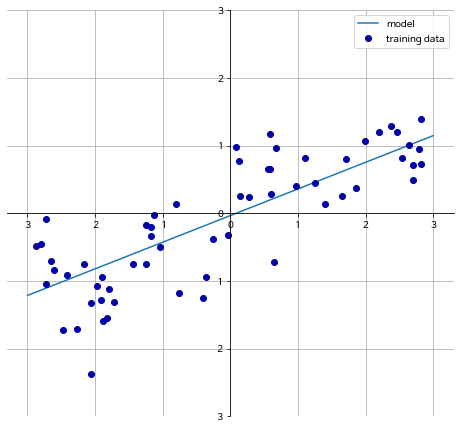

In [2]:
mglearn.plots.plot_linear_regression_wave()

## 선형 회귀

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression().fit(x_train, y_train)

In [4]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [5]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [6]:
x, y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

In [7]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(x_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [9]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(x_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [10]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(x_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


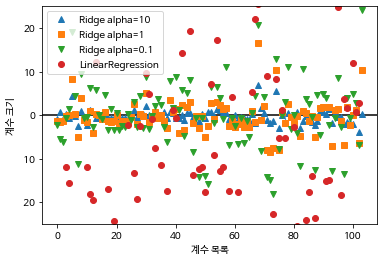

In [11]:
plt.plot(ridge10.coef_,'^', label= "Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

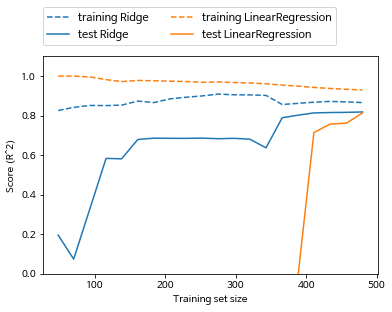

In [12]:
mglearn.plots.plot_ridge_n_samples()

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(x_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수 4


In [14]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(x_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [15]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

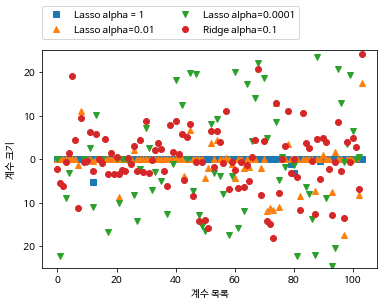

In [16]:
plt.plot(lasso.coef_, 's', label="Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

## 분류용 선형 모델

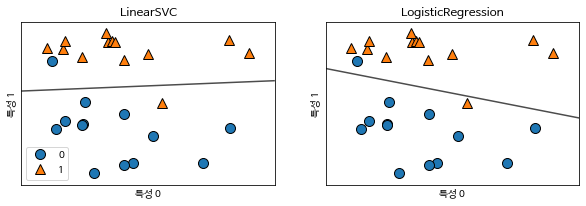

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(x, y)
  mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5,
                                  ax=ax, alpha=.7)
  mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend()



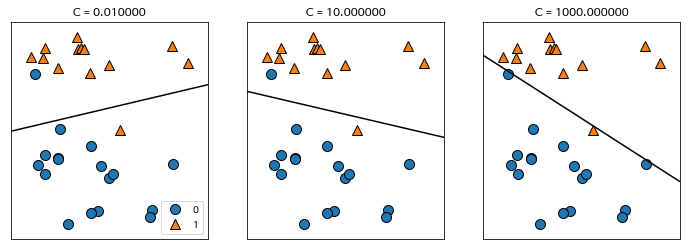

In [18]:
mglearn.plots.plot_linear_svc_regularization()

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(x_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(x_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(x_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [21]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(x_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(x_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(x_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.972


In [22]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(x_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(x_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(x_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


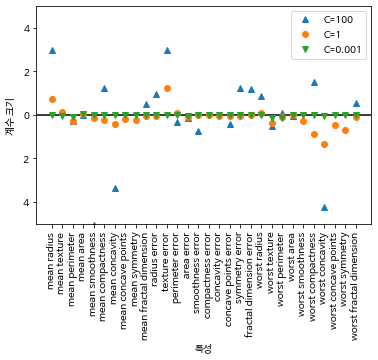

In [23]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


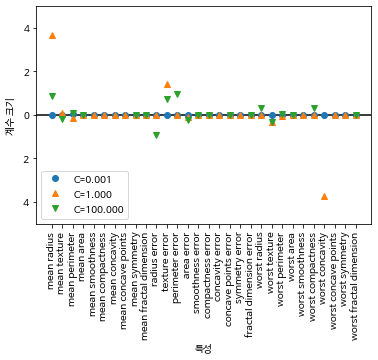

In [28]:
for c, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=c, penalty='l1', max_iter=1000).fit(x_train, y_train)
  print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(c, lr_l1.score(x_train, y_train)) )
  print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(c, lr_l1.score(x_test, y_test)) )
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(c))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델

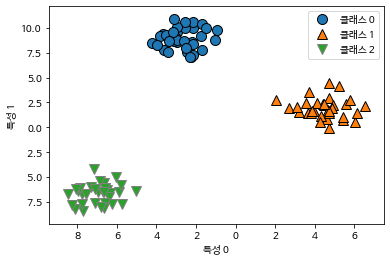

In [29]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [31]:
linear_svm = LinearSVC().fit(x, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


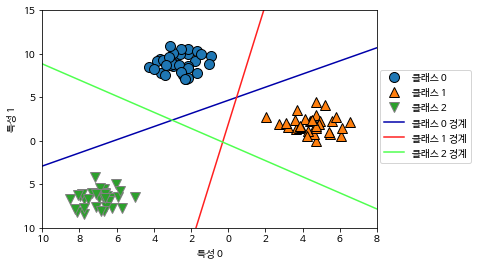

In [32]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

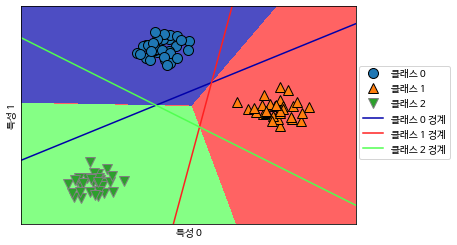

In [33]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")